In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Loading data

Load train, test and sample data and get info about the dataset

In [2]:
# Load data
train = pd.read_csv("data/playground-series-s4e4/train.csv")
train = train.drop("id", axis=1)
test = pd.read_csv("data/playground-series-s4e4/test.csv")
test = test.drop("id", axis=1)
sample = pd.read_csv("data/playground-series-s4e4/sample_submission.csv")
test["Rings"] = sample["Rings"]

In [3]:
train.head()

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [4]:
test.head()

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,M,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005,10
1,M,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750,10
2,M,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405,10
3,M,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350,10
4,I,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050,10


In [5]:
sample.head()

,id,Rings
0,90615,10
1,90616,10
2,90617,10
3,90618,10
4,90619,10


Get record count for every subset of the data

In [6]:
len(train), len(test), len(sample)

(90615, 60411, 60411)

Info about every subset

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90615 entries, 0 to 90614
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             90615 non-null  object 
 1   Length          90615 non-null  float64
 2   Diameter        90615 non-null  float64
 3   Height          90615 non-null  float64
 4   Whole weight    90615 non-null  float64
 5   Whole weight.1  90615 non-null  float64
 6   Whole weight.2  90615 non-null  float64
 7   Shell weight    90615 non-null  float64
 8   Rings           90615 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 6.2+ MB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60411 entries, 0 to 60410
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             60411 non-null  object 
 1   Length          60411 non-null  float64
 2   Diameter        60411 non-null  float64
 3   Height          60411 non-null  float64
 4   Whole weight    60411 non-null  float64
 5   Whole weight.1  60411 non-null  float64
 6   Whole weight.2  60411 non-null  float64
 7   Shell weight    60411 non-null  float64
 8   Rings           60411 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 4.1+ MB


In [9]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60411 entries, 0 to 60410
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      60411 non-null  int64
 1   Rings   60411 non-null  int64
dtypes: int64(2)
memory usage: 944.1 KB


Check for missing values

In [10]:
train.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Whole weight.1    0
Whole weight.2    0
Shell weight      0
Rings             0
dtype: int64

In [11]:
test.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Whole weight.1    0
Whole weight.2    0
Shell weight      0
Rings             0
dtype: int64

In [12]:
sample.isna().sum()

id       0
Rings    0
dtype: int64

# 2. Plotting data

Plot continuous data and feature distribution

## 2.1. Sex distribution

Set some global variables

In [13]:
# Set color scheme
sns.set_palette('Set3')
colors = sns.color_palette()
colors

[(0.5529411764705883, 0.8274509803921568, 0.7803921568627451),
 (1.0, 1.0, 0.7019607843137254),
 (0.7450980392156863, 0.7294117647058823, 0.8549019607843137),
 (0.984313725490196, 0.5019607843137255, 0.4470588235294118),
 (0.5019607843137255, 0.6941176470588235, 0.8274509803921568),
 (0.9921568627450981, 0.7058823529411765, 0.3843137254901961),
 (0.7019607843137254, 0.8705882352941177, 0.4117647058823529),
 (0.9882352941176471, 0.803921568627451, 0.8980392156862745),
 (0.8509803921568627, 0.8509803921568627, 0.8509803921568627),
 (0.7372549019607844, 0.5019607843137255, 0.7411764705882353),
 (0.8, 0.9215686274509803, 0.7725490196078432),
 (1.0, 0.9294117647058824, 0.43529411764705883)]

In [14]:
def sex_dist(df, name):
    keys = df["Sex"].value_counts().keys().tolist()
    values = df["Sex"].value_counts().tolist()
    sex = dict(zip(keys, values))
    fig, ax = plt.subplots()
    for i, x in enumerate(sex.items()):
        ax.bar(x[0], x[1], color=colors[i], edgecolor='black')
    ax.set(xlabel="Sex",
           ylabel="Count",
           title=f"Sex Distribution ({name} dataset)")
    ax.legend(keys)
    fig.savefig(f"images/s4e4/{name}-sex-distribution.png")

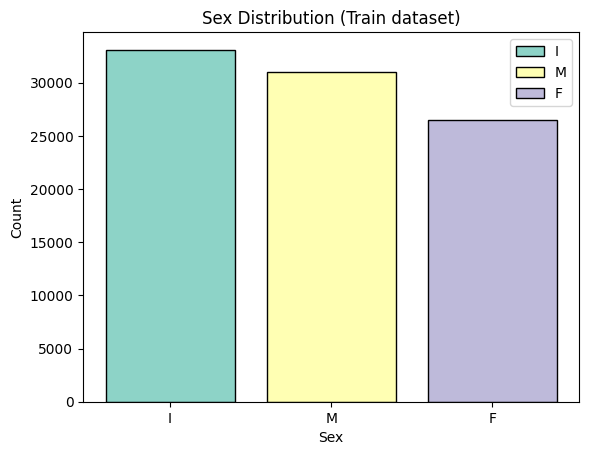

In [15]:
sex_dist(train, "Train")

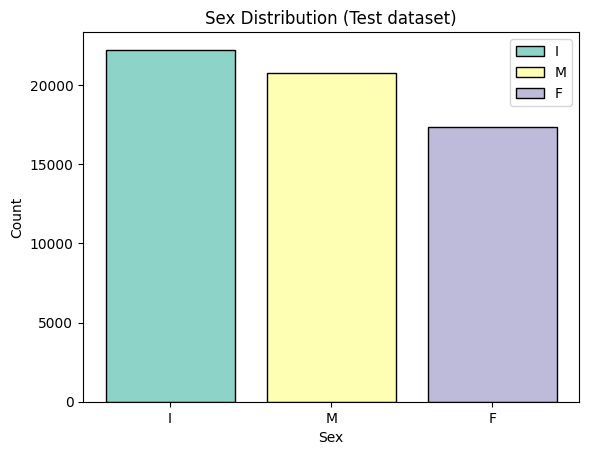

In [16]:
sex_dist(test, "Test")

## 2.2. Distribution of parameters

Draw a histogram of parameter distribution

#### 2.2.1. Train data distribution

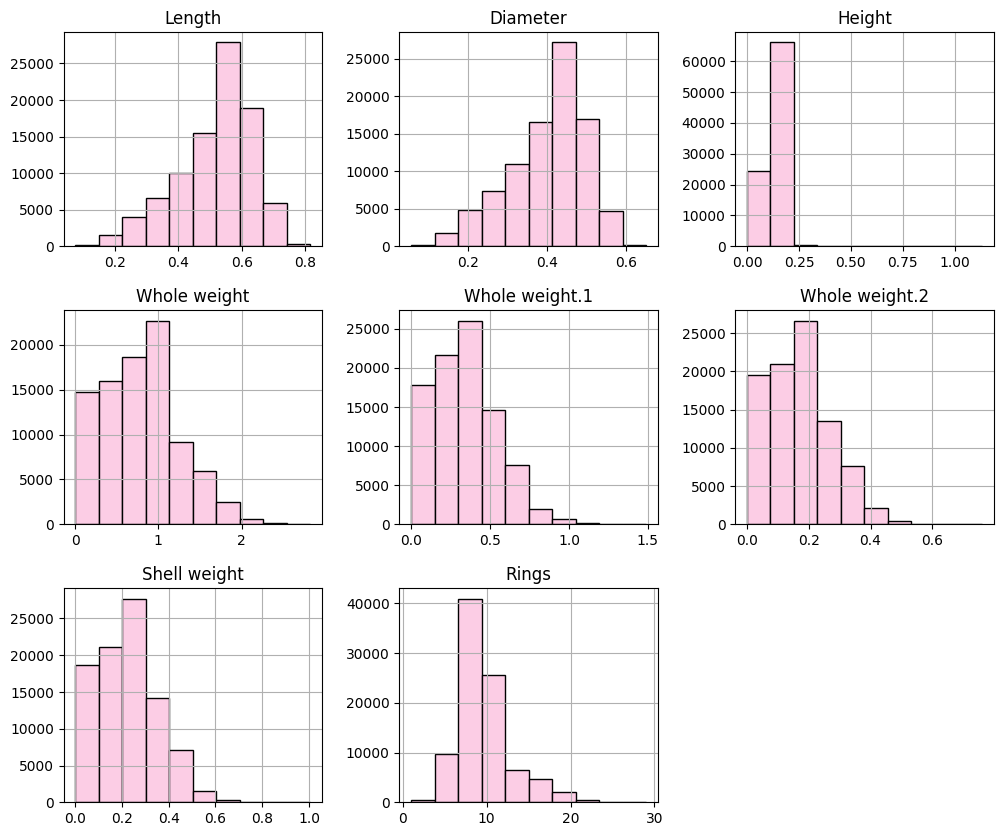

In [17]:
train.hist(figsize=(12, 10), color=colors[7], edgecolor='black');

#### 2.2.2. Test data distribution

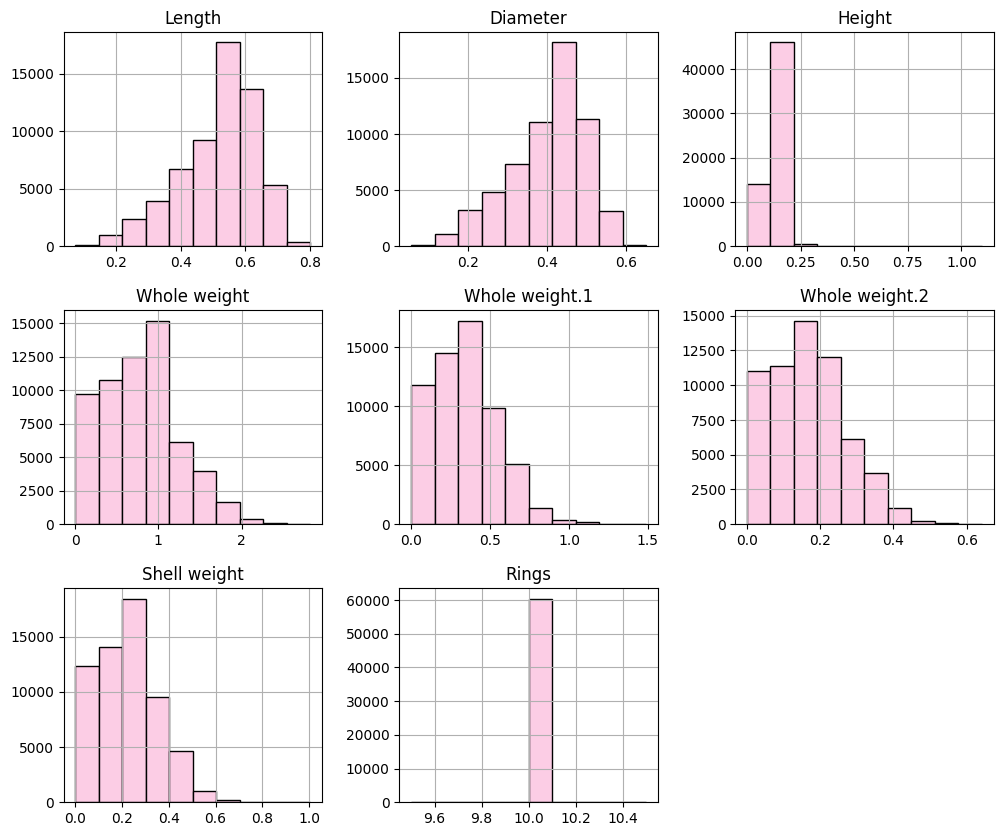

In [18]:
test.hist(figsize=(12, 10), color=colors[7], edgecolor='black');

### 2.3. Violin plot

#### 2.3.1 Train data violin plot

/tmp/ipykernel_101277/3938551921.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Sex', y='Rings', data=train, palette='pastel');


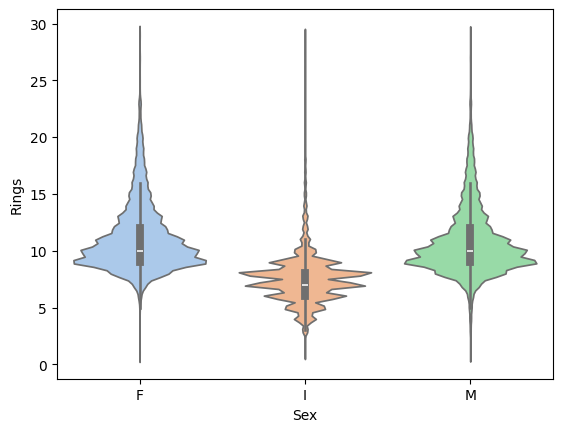

In [19]:
sns.violinplot(x='Sex', y='Rings', data=train, palette='pastel');

# 3. Data preprocessing

Prepare data for training a model

In [20]:
X_train = train.drop("Rings", axis=1)
y_train = train["Rings"]
X_test = test.drop("Rings", axis=1)
y_test = test["Rings"]

In [21]:
X_test

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,M,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005
1,M,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750
2,M,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405
3,M,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350
4,I,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050
...,...,...,...,...,...,...,...,...
60406,I,0.345,0.260,0.085,0.1775,0.0735,0.0265,0.0500
60407,F,0.525,0.410,0.145,0.8445,0.3885,0.1670,0.2050
60408,I,0.590,0.440,0.155,1.1220,0.3930,0.2000,0.2650
60409,F,0.660,0.525,0.190,1.4935,0.5885,0.3575,0.4350


In [22]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
def encode(df, enc):
    cat_features = ["Sex"]
    #enc = OneHotEncoder()
    transformer  = ColumnTransformer([("one_hot",
                                        enc,
                                        cat_features)],
                                        remainder="passthrough")
    return pd.DataFrame(transformer.fit_transform(df))
transformed_X = encode(X_train, OneHotEncoder())
transformed_Y = encode(X_test, OneHotEncoder())

In [23]:
transformed_X

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.0,0.0,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400
1,1.0,0.0,0.0,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200
2,0.0,1.0,0.0,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050
3,0.0,0.0,1.0,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500
4,0.0,1.0,0.0,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975
...,...,...,...,...,...,...,...,...,...,...
90610,0.0,0.0,1.0,0.335,0.235,0.075,0.1585,0.0685,0.0370,0.0450
90611,0.0,0.0,1.0,0.555,0.425,0.150,0.8790,0.3865,0.1815,0.2400
90612,0.0,1.0,0.0,0.435,0.330,0.095,0.3215,0.1510,0.0785,0.0815
90613,0.0,1.0,0.0,0.345,0.270,0.075,0.2000,0.0980,0.0490,0.0700


In [24]:
transformed_Y

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,1.0,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005
1,0.0,0.0,1.0,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750
2,0.0,0.0,1.0,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405
3,0.0,0.0,1.0,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350
4,0.0,1.0,0.0,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050
...,...,...,...,...,...,...,...,...,...,...
60406,0.0,1.0,0.0,0.345,0.260,0.085,0.1775,0.0735,0.0265,0.0500
60407,1.0,0.0,0.0,0.525,0.410,0.145,0.8445,0.3885,0.1670,0.2050
60408,0.0,1.0,0.0,0.590,0.440,0.155,1.1220,0.3930,0.2000,0.2650
60409,1.0,0.0,0.0,0.660,0.525,0.190,1.4935,0.5885,0.3575,0.4350


In [25]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((90615, 8), (90615,), (60411, 8), (60411,))

In [26]:
y_test

0        10
1        10
2        10
3        10
4        10
         ..
60406    10
60407    10
60408    10
60409    10
60410    10
Name: Rings, Length: 60411, dtype: int64

In [27]:
y_train

0        11
1        11
2         6
3        10
4         9
         ..
90610     6
90611     9
90612     6
90613     6
90614     8
Name: Rings, Length: 90615, dtype: int64

In [28]:
X_train = transformed_X

In [29]:
X_train

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.0,0.0,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400
1,1.0,0.0,0.0,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200
2,0.0,1.0,0.0,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050
3,0.0,0.0,1.0,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500
4,0.0,1.0,0.0,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975
...,...,...,...,...,...,...,...,...,...,...
90610,0.0,0.0,1.0,0.335,0.235,0.075,0.1585,0.0685,0.0370,0.0450
90611,0.0,0.0,1.0,0.555,0.425,0.150,0.8790,0.3865,0.1815,0.2400
90612,0.0,1.0,0.0,0.435,0.330,0.095,0.3215,0.1510,0.0785,0.0815
90613,0.0,1.0,0.0,0.345,0.270,0.075,0.2000,0.0980,0.0490,0.0700


In [30]:
X_test = transformed_Y

In [31]:
X_test

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,1.0,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005
1,0.0,0.0,1.0,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750
2,0.0,0.0,1.0,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405
3,0.0,0.0,1.0,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350
4,0.0,1.0,0.0,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050
...,...,...,...,...,...,...,...,...,...,...
60406,0.0,1.0,0.0,0.345,0.260,0.085,0.1775,0.0735,0.0265,0.0500
60407,1.0,0.0,0.0,0.525,0.410,0.145,0.8445,0.3885,0.1670,0.2050
60408,0.0,1.0,0.0,0.590,0.440,0.155,1.1220,0.3930,0.2000,0.2650
60409,1.0,0.0,0.0,0.660,0.525,0.190,1.4935,0.5885,0.3575,0.4350


In [32]:
y_train

0        11
1        11
2         6
3        10
4         9
         ..
90610     6
90611     9
90612     6
90613     6
90614     8
Name: Rings, Length: 90615, dtype: int64

In [33]:
y_test

0        10
1        10
2        10
3        10
4        10
         ..
60406    10
60407    10
60408    10
60409    10
60410    10
Name: Rings, Length: 60411, dtype: int64

# 4. Create a model

Instantiate the `RandomForestClassifier` classifier and fit it to training data

In [37]:
%%time
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor(n_estimators=100, criterion = 'friedman_mse', random_state = 42)
clf.fit(X_train, y_train)

CPU times: user 43.1 s, sys: 342 ms, total: 43.4 s
Wall time: 43.8 s


RandomForestRegressor(criterion='friedman_mse', random_state=42)

# 5. Evaluate a model

Evaluate a model using `root_mean_squared_log_error` method

In [40]:
%%time
from sklearn.metrics import root_mean_squared_error

y_preds = clf.predict(X_test)
X = root_mean_squared_error(y_test, y_preds)

CPU times: user 1.6 s, sys: 11 µs, total: 1.6 s
Wall time: 1.6 s


In [41]:
%%time
clf.score(X_test, y_test)

CPU times: user 1.6 s, sys: 3.22 ms, total: 1.6 s
Wall time: 1.61 s


0.0

In [42]:
X

2.678228099371609